#"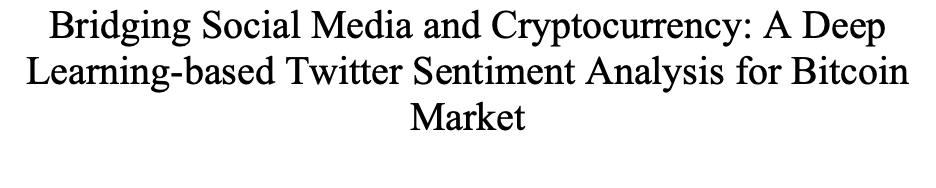

# Necessary Libraries import

In [68]:
import pandas as pd


In [69]:
Df1 = pd.read_csv('/content/Bitcoin_Historical_Data.csv')
Df2 = pd.read_excel('/content/twitter_data_excel.xlsx')
df_combined = pd.concat([Df1, Df2], ignore_index=True)
df_combined.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'User',
       'Location', 'tweet', 'Followers', 'Likes', 'Retweets'],
      dtype='object')

In [70]:
df_combined = pd.concat([Df1, Df2], ignore_index=True)
df_combined.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'User',
       'Location', 'tweet', 'Followers', 'Likes', 'Retweets'],
      dtype='object')

Checking missing values

In [71]:
missing_values_df_combined = df_combined.isnull().sum()
print(missing_values_df_combined)

Date             0
Price        14800
Open         14800
High         14800
Low          14800
Vol.         14800
Change %     14800
User          1126
Location      5149
tweet         1126
Followers     1126
Likes         1126
Retweets      1126
dtype: int64


In [72]:
print(df_combined.dtypes)

Date          object
Price         object
Open          object
High          object
Low           object
Vol.          object
Change %      object
User          object
Location      object
tweet         object
Followers    float64
Likes        float64
Retweets     float64
dtype: object


In [73]:
df_combined = df_combined.fillna(method='ffill')

In [74]:
df_combined = df_combined.fillna(method='bfill')

In [75]:
df_combined = df_combined.fillna(method='ffill')

In [76]:
missing_values_df_combined = df_combined.isnull().sum()
print(missing_values_df_combined)

Date         0
Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
User         0
Location     0
tweet        0
Followers    0
Likes        0
Retweets     0
dtype: int64


In [77]:
!pip install tensorflow

In [78]:
df_combined['tweet'] = df_combined['tweet'].astype(str)
df_combined['Price'] = pd.to_numeric(df_combined['Price'], errors='coerce')

# Data Normalisation

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [80]:
min_max_scaler = MinMaxScaler()
df_combined[['Price','Followers','Likes','Retweets']] = min_max_scaler.fit_transform(df_combined[['Price','Followers','Likes','Retweets']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [81]:
standard_scaler = StandardScaler()

In [82]:
df_combined[['Price','Followers','Likes','Retweets']] = standard_scaler.fit_transform(df_combined[['Price','Followers','Likes','Retweets']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [83]:
import pandas as pd
missing_values_df_combined = df_combined.isnull().sum()
print(missing_values_df_combined)

Date             0
Price        15926
Open             0
High             0
Low              0
Vol.             0
Change %         0
User             0
Location         0
tweet            0
Followers        0
Likes            0
Retweets         0
dtype: int64


In [84]:
print(df_combined['Price'].dtype)

float64


In [85]:
df_combined['Price'] = pd.to_numeric(df_combined['Price'], errors='coerce')

In [86]:
df_combined['Price'].fillna(df_combined['Price'].mean(), inplace=True)

In [87]:
missing_values_df_combined = df_combined.isnull().sum()
print(missing_values_df_combined)

Date             0
Price        15926
Open             0
High             0
Low              0
Vol.             0
Change %         0
User             0
Location         0
tweet            0
Followers        0
Likes            0
Retweets         0
dtype: int64


In [88]:
!pip install fancyimpute

In [89]:
from sklearn.impute import KNNImputer
import numpy as np
df_filled = df_combined.copy()

In [90]:
df_filled['Price'].fillna(1, inplace=True)

In [91]:
import pandas as pd
# Assuming 'df' is dataframe
missing_values_df_combined = df_filled.isnull().sum()
print(missing_values_df_combined)

Date         0
Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
User         0
Location     0
tweet        0
Followers    0
Likes        0
Retweets     0
dtype: int64


In [92]:
df_combined=df_filled

In [93]:
df_combined.dtypes

Date          object
Price        float64
Open          object
High          object
Low           object
Vol.          object
Change %      object
User          object
Location      object
tweet         object
Followers    float64
Likes        float64
Retweets     float64
dtype: object

# Sentiment Analysis

In [94]:
from textblob import TextBlob

In [95]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
# Create two new columns 'Subjectivity' & 'Polarit'
df_combined['Subjectivity'] = df_combined['tweet'].apply(getSubjectivity)
df_combined['Polarity'] = df_combined['tweet'].apply(getPolarity)
# Display the updated dataframe with new columns
print(df_combined)

                      Date  Price      Open      High       Low     Vol.  \
0             Jan 30, 2023    1.0  23,746.0  23,794.0  22,560.0  339.62K   
1             Jan 29, 2023    1.0  23,023.5  23,952.9  22,973.3  320.86K   
2             Jan 28, 2023    1.0  23,074.6  23,182.3  22,889.8  156.96K   
3             Jan 27, 2023    1.0  23,016.0  23,480.3  22,602.9  310.36K   
4             Jan 26, 2023    1.0  23,055.2  23,259.5  22,869.0  320.97K   
...                    ...    ...       ...       ...       ...      ...   
15921  2021-01-02 17:57:31    1.0   7,196.4   7,259.4   7,180.0  420.28K   
15922  2021-01-02 17:53:56    1.0   7,196.4   7,259.4   7,180.0  420.28K   
15923  2021-01-02 16:47:18    1.0   7,196.4   7,259.4   7,180.0  420.28K   
15924  2021-01-02 16:34:41    1.0   7,196.4   7,259.4   7,180.0  420.28K   
15925  2021-01-02 15:14:30    1.0   7,196.4   7,259.4   7,180.0  420.28K   

      Change %         User                        Location  \
0       -3.88%     aanto

##LSTM Algorithm

In [96]:
# Convert 'Polarity' column to binary values
df_combined['Polarity'] = df_combined['Polarity'].apply(lambda x:1 if x >0 else 0)

In [97]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [98]:
# Data Preprocessing
df_combined['tweet'] = df_combined['tweet'].astype(str)
# Convert 'tweet' column to strings
# Assuming 'Price' is target column in the dataframe
prices = df_combined['Price'].values

In [99]:
# Hyperparameters
vocab_size =10000
# Maximum number of words to keep, based on word frequency
max_length =100
# Maximum length of all sequences
embedding_dim =32
# Embedding dimension
trunc_type ='post'
# Where to truncate sequences that exceed max_length
padding_type ='post'
# Where to pad sequences that are shorter than max
oov_token ='<OOV>'
# Out-Of-Vocabulary token

In [100]:
# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df_combined['tweet'])
sequences = tokenizer.texts_to_sequences(df_combined['tweet'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, prices, test_size=0.2, random_state=42)
# Define the LSTM model for regression
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))

In [102]:
# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
# Train the model
model.fit(X_train, y_train, epochs=10
, validation_data=(X_test, y_test))
# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error: %.2f"% scores[1])

Epoch 1/10
399/399 [==============================] - 77s 182ms/step - loss: 0.0220 - mean_absolute_error: 0.0570 - val_loss: 4.2609e-05 - val_mean_absolute_error: 0.0065
Epoch 2/10
399/399 [==============================] - 71s 178ms/step - loss: 7.3387e-04 - mean_absolute_error: 0.0216 - val_loss: 6.0946e-05 - val_mean_absolute_error: 0.0078
Epoch 3/10
399/399 [==============================] - 69s 172ms/step - loss: 4.7174e-04 - mean_absolute_error: 0.0173 - val_loss: 1.3138e-05 - val_mean_absolute_error: 0.0036
Epoch 4/10
399/399 [==============================] - 70s 176ms/step - loss: 3.3551e-04 - mean_absolute_error: 0.0146 - val_loss: 1.5817e-04 - val_mean_absolute_error: 0.0126
Epoch 5/10
399/399 [==============================] - 72s 181ms/step - loss: 2.3717e-04 - mean_absolute_error: 0.0123 - val_loss: 1.9073e-05 - val_mean_absolute_error: 0.0044
Epoch 6/10
399/399 [==============================] - 70s 176ms/step - loss: 1.5253e-04 - mean_absolute_error: 0.0099 - val_loss:

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Use the model to generate predictions on the test data
y_pred = model.predict(X_test)
# Flatten y_test and y_pred arrays for compatibility with error metrics
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()
# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_flat, y_pred_flat)
mae = mean_absolute_error(y_test_flat, y_pred_flat)
rmse = np.sqrt(mse)
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

100/100 [==============================] - 2s 19ms/step
Mean Squared Error (MSE): 2.6946464170727836e-06
Mean Absolute Error (MAE): 0.0016414340905849842
Root Mean Squared Error (RMSE): 0.001641537820786589


In [104]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
399/399 [==============================] - 71s 178ms/step - loss: 2.0079e-05 - mean_absolute_error: 0.0036 - val_loss: 8.6098e-06 - val_mean_absolute_error: 0.0029
Epoch 2/10
399/399 [==============================] - 70s 176ms/step - loss: 1.3536e-05 - mean_absolute_error: 0.0029 - val_loss: 3.2369e-06 - val_mean_absolute_error: 0.0018
Epoch 3/10
399/399 [==============================] - 68s 171ms/step - loss: 1.1471e-05 - mean_absolute_error: 0.0027 - val_loss: 4.2889e-06 - val_mean_absolute_error: 0.0021
Epoch 4/10
399/399 [==============================] - 70s 176ms/step - loss: 9.5249e-06 - mean_absolute_error: 0.0025 - val_loss: 9.1458e-07 - val_mean_absolute_error: 9.5611e-04
Epoch 5/10
399/399 [==============================] - 69s 172ms/step - loss: 7.4038e-06 - mean_absolute_error: 0.0022 - val_loss: 3.3880e-05 - val_mean_absolute_error: 0.0058
Epoch 6/10
399/399 [==============================] - 72s 180ms/step - loss: 7.1156e-06 - mean_absolute_error: 0.0021 - v

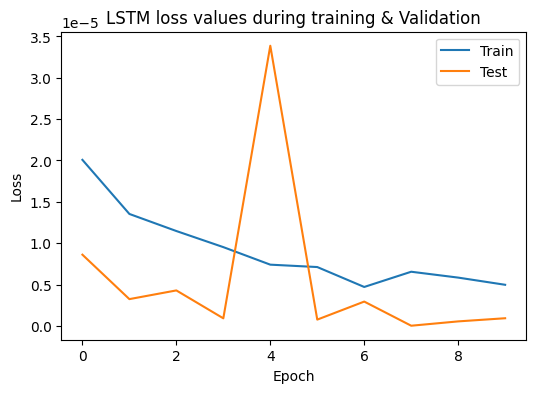

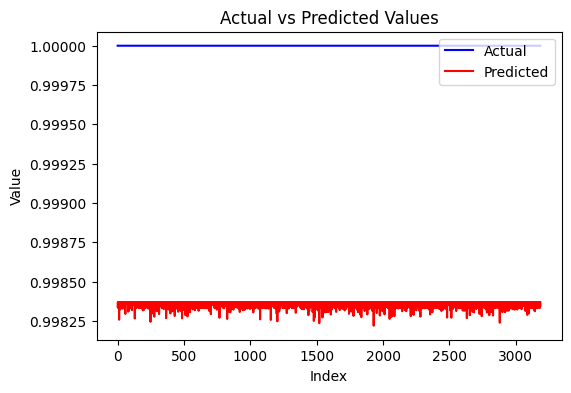

In [105]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss values during training & Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()
# Plot actual vs predicted values
plt.figure(figsize=(6,4))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Index')
plt.legend(loc='upper right')
plt.show()

In [106]:
!pip install pystan

In [107]:
!pip install prophet

In [108]:
# Preparing data
df_combined = df_combined.reset_index(drop=True)
df_combined = df_combined.rename(columns={'Date':'ds','Price':'y'})

##CNN Algorithm

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, prices, test_size=0.2, random_state=42)

In [111]:
# Define the CNN model for regression
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [112]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
399/399 [==============================] - 5s 10ms/step - loss: 0.0283 - mean_absolute_error: 0.0648 - val_loss: 3.2776e-04 - val_mean_absolute_error: 0.0133
Epoch 2/10
399/399 [==============================] - 5s 13ms/step - loss: 1.8287e-04 - mean_absolute_error: 0.0098 - val_loss: 2.2910e-04 - val_mean_absolute_error: 0.0110
Epoch 3/10
399/399 [==============================] - 5s 11ms/step - loss: 7.6716e-05 - mean_absolute_error: 0.0062 - val_loss: 1.5989e-04 - val_mean_absolute_error: 0.0093
Epoch 4/10
399/399 [==============================] - 4s 10ms/step - loss: 6.2047e-05 - mean_absolute_error: 0.0052 - val_loss: 1.6271e-04 - val_mean_absolute_error: 0.0095
Epoch 5/10
399/399 [==============================] - 5s 11ms/step - loss: 6.3138e-05 - mean_absolute_error: 0.0052 - val_loss: 1.2254e-04 - val_mean_absolute_error: 0.0082
Epoch 6/10
399/399 [==============================] - 5s 13ms/step - loss: 6.2117e-05 - mean_absolute_error: 0.0051 - val_loss: 1.0557e-04 

In [113]:
# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error: %.2f" % scores[1])

# Use the model to generate predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

Mean Absolute Error: 0.01
100/100 [==============================] - 0s 3ms/step


In [114]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 5.1190681190516784e-05
Mean Absolute Error (MAE): 0.005706011837410313
Root Mean Squared Error (RMSE): 0.007154766326758462


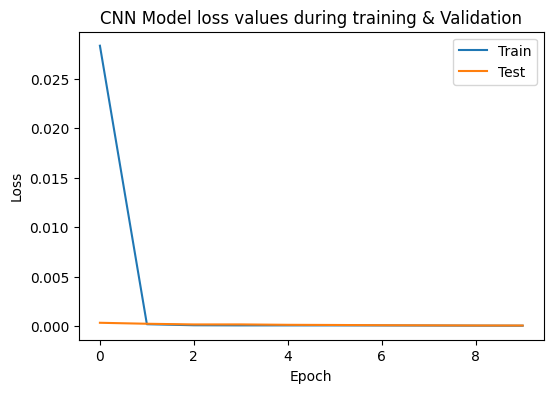

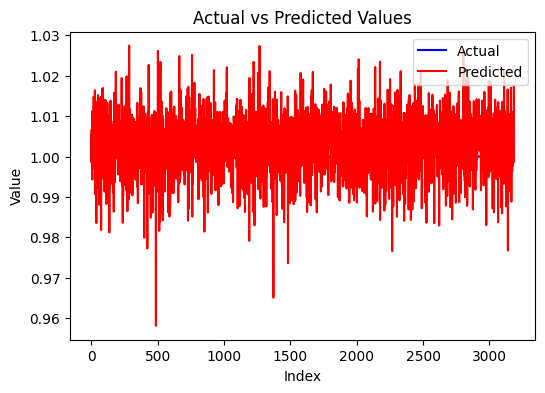

In [115]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss values during training & Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Index')
plt.legend(loc='upper right')
plt.show()

# ANN Algorithm

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, prices, test_size=0.2, random_state=42)

In [117]:
# Define the ANN model for regression
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100))  # Adjust input_dim accordingly (e.g., if  have 100 features)
model.add(Dense(1))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [118]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
399/399 [==============================] - 1s 2ms/step - loss: 66571.9375 - mean_absolute_error: 147.4691 - val_loss: 24819.0156 - val_mean_absolute_error: 94.2223
Epoch 2/10
399/399 [==============================] - 1s 2ms/step - loss: 14993.0186 - mean_absolute_error: 72.8246 - val_loss: 11321.0107 - val_mean_absolute_error: 62.0205
Epoch 3/10
399/399 [==============================] - 1s 2ms/step - loss: 6835.5195 - mean_absolute_error: 49.0890 - val_loss: 6965.0371 - val_mean_absolute_error: 48.0111
Epoch 4/10
399/399 [==============================] - 1s 2ms/step - loss: 3855.0234 - mean_absolute_error: 37.6278 - val_loss: 4523.1753 - val_mean_absolute_error: 38.7433
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 2424.4565 - mean_absolute_error: 30.0604 - val_loss: 3326.0266 - val_mean_absolute_error: 32.6861
Epoch 6/10
399/399 [==============================] - 1s 3ms/step - loss: 1603.2162 - mean_absolute_error: 24.7126 - val_loss: 2234.932

In [119]:
# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error: %.2f" % scores[1])

Mean Absolute Error: 13.20


In [120]:
# Use the model to generate predictions on the test data
y_pred = model.predict(X_test)

100/100 [==============================] - 0s 2ms/step


In [121]:
# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 535.8506891386692
Mean Absolute Error (MAE): 13.20105637750271
Root Mean Squared Error (RMSE): 23.148448957514823


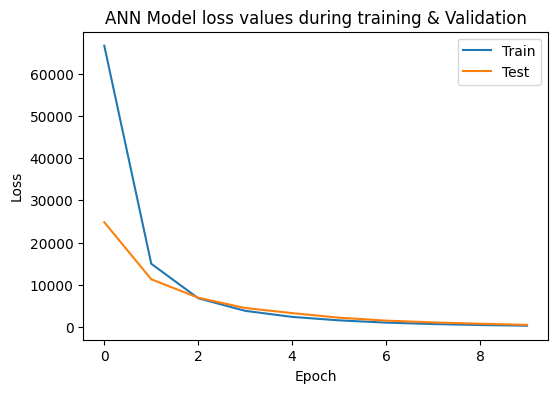

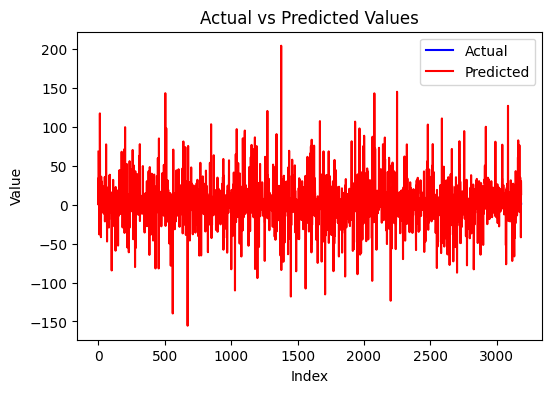

In [122]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model loss values during training & Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Index')
plt.legend(loc='upper right')
plt.show()

# RNN Model

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, prices, test_size=0.2, random_state=42)

In [124]:
# Define the RNN model for regression
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [125]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
399/399 [==============================] - 74s 178ms/step - loss: 0.0251 - mean_absolute_error: 0.0603 - val_loss: 2.4014e-05 - val_mean_absolute_error: 0.0049
Epoch 2/10
399/399 [==============================] - 68s 170ms/step - loss: 5.8566e-04 - mean_absolute_error: 0.0192 - val_loss: 2.9509e-05 - val_mean_absolute_error: 0.0054
Epoch 3/10
399/399 [==============================] - 70s 176ms/step - loss: 3.0521e-04 - mean_absolute_error: 0.0139 - val_loss: 9.0506e-05 - val_mean_absolute_error: 0.0095
Epoch 4/10
399/399 [==============================] - 67s 168ms/step - loss: 1.5639e-04 - mean_absolute_error: 0.0099 - val_loss: 5.5685e-06 - val_mean_absolute_error: 0.0024
Epoch 5/10
399/399 [==============================] - 69s 174ms/step - loss: 9.0382e-05 - mean_absolute_error: 0.0076 - val_loss: 1.5790e-06 - val_mean_absolute_error: 0.0013
Epoch 6/10
399/399 [==============================] - 66s 165ms/step - loss: 5.2089e-05 - mean_absolute_error: 0.0057 - val_loss:

In [126]:
# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error: %.2f" % scores[1])

Mean Absolute Error: 0.00


In [127]:
# Use the model to generate predictions on the test data
y_pred = model.predict(X_test)

100/100 [==============================] - 2s 18ms/step


In [128]:
# Calculate Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1.2956063076940763e-05
Mean Absolute Error (MAE): 0.003599451011782237
Root Mean Squared Error (RMSE): 0.00359945316359871


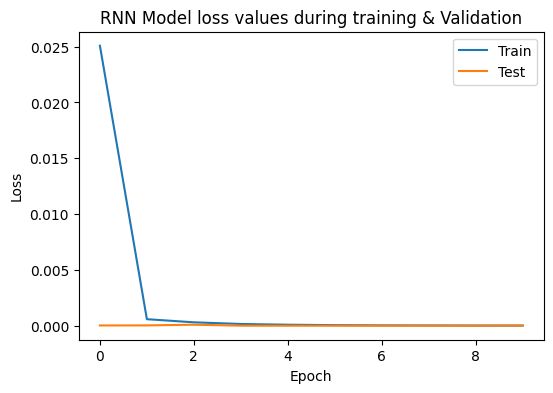

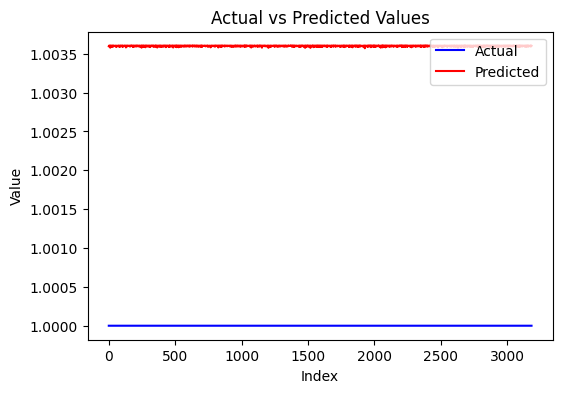

In [129]:
# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Model loss values during training & Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.ylabel ('Value')
plt.xlabel('Index')
plt.legend(loc='upper right')
plt.show()

#Bitcoin Forecasting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/vq2fcg5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/f2jp9vx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44557', 'data', 'file=/tmp/tmpnsmd_ae1/vq2fcg5d.json', 'init=/tmp/tmpnsmd_ae1/f2jp9vx2.json', 'output', 'file=/tmp/tmpnsmd_ae1/prophet_modelomh_5m9o/prophet_model-20231118033512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         trend    yhat_lower     yhat_upper   trend_lower  \
0    2020-01-01   7021.145875  3.481198e+03   10775.444492  7.021146e+03   
1    2020-01-02   6940.373502  3.496178e+03   10949.943433  6.940374e+03   
2    2020-01-03   6859.601130  3.910355e+03   11025.732304  6.859601e+03   
3    2020-01-04   6778.828758  3.790438e+03   11390.462304  6.778829e+03   
4    2020-01-05   6698.056386  4.141973e+03   11573.815106  6.698056e+03   
...         ...           ...           ...            ...           ...   
2946 2028-01-25 -74946.761613 -1.005588e+06  832720.953094 -1.006359e+06   
2947 2028-01-26 -74997.292279 -1.003738e+06  832209.122301 -1.006932e+06   
2948 2028-01-27 -75047.822944 -1.008939e+06  831193.449346 -1.007506e+06   
2949 2028-01-28 -75098.353609 -1.011303e+06  832830.264273 -1.008062e+06   
2950 2028-01-29 -75148.884274 -1.010926e+06  839126.554762 -1.008725e+06   

        trend_upper  additive_terms  additive_terms_lower  \
0       7021.145875       

<Figure size 500x600 with 0 Axes>

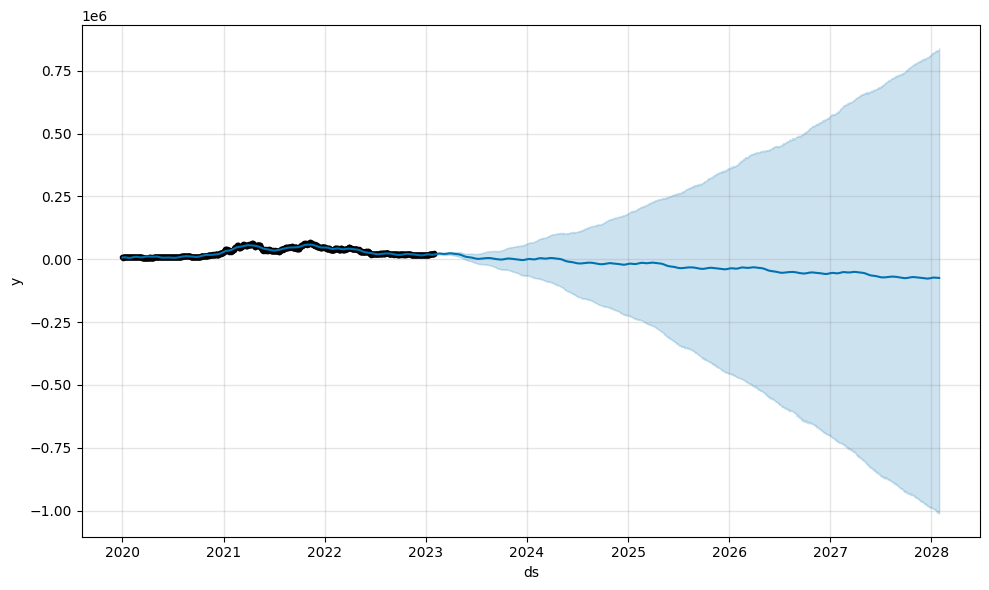

In [130]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the Bitcoin historical data from a CSV file
Bitcoindf = pd.read_csv('/content/Bitcoin_Historical_Data.csv')

# Replace commas and convert the 'Price' column to a float
# Adjust 'Price' to specific column name if it's different
Bitcoindf['Price'] = Bitcoindf['Price'].str.replace(',', '').astype(float)

# Rename the columns for Prophet compatibility
Bitcoindf.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Define and fit the model
model = Prophet()
model.fit(Bitcoindf)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=1825) # Forecasting for the next 5 years

# Make prediction
forecast = model.predict(future)

# Print the forecast
print(forecast)

# Optionally, plot the forecast
plt.figure(figsize=(5, 6))
model.plot(forecast)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/w3lnvw_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/r2npt6lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83994', 'data', 'file=/tmp/tmpnsmd_ae1/w3lnvw_6.json', 'init=/tmp/tmpnsmd_ae1/r2npt6lq.json', 'output', 'file=/tmp/tmpnsmd_ae1/prophet_modelghm53c9j/prophet_model-20231118033515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         trend     yhat_lower     yhat_upper    trend_lower  \
0    2020-01-01   7021.145875    3509.270065   10432.837259    7021.145875   
1    2020-01-02   6940.373502    3500.741570   10767.558109    6940.373502   
2    2020-01-03   6859.601130    3911.404215   11111.712799    6859.601130   
3    2020-01-04   6778.828758    4034.821964   11152.692377    6778.828758   
4    2020-01-05   6698.056386    4232.454328   11550.645809    6698.056386   
...         ...           ...            ...            ...            ...   
2946 2028-01-25 -74946.761613 -926398.776019  776977.602957 -925661.564531   
2947 2028-01-26 -74997.292279 -925909.541226  774515.583775 -926752.696338   
2948 2028-01-27 -75047.822944 -926891.057294  779196.772306 -927843.828145   
2949 2028-01-28 -75098.353609 -927575.542793  776220.823419 -928897.585342   
2950 2028-01-29 -75148.884274 -928229.812770  777877.456330 -929945.649558   

        trend_upper  additive_terms  additive_terms_lower  \
0 

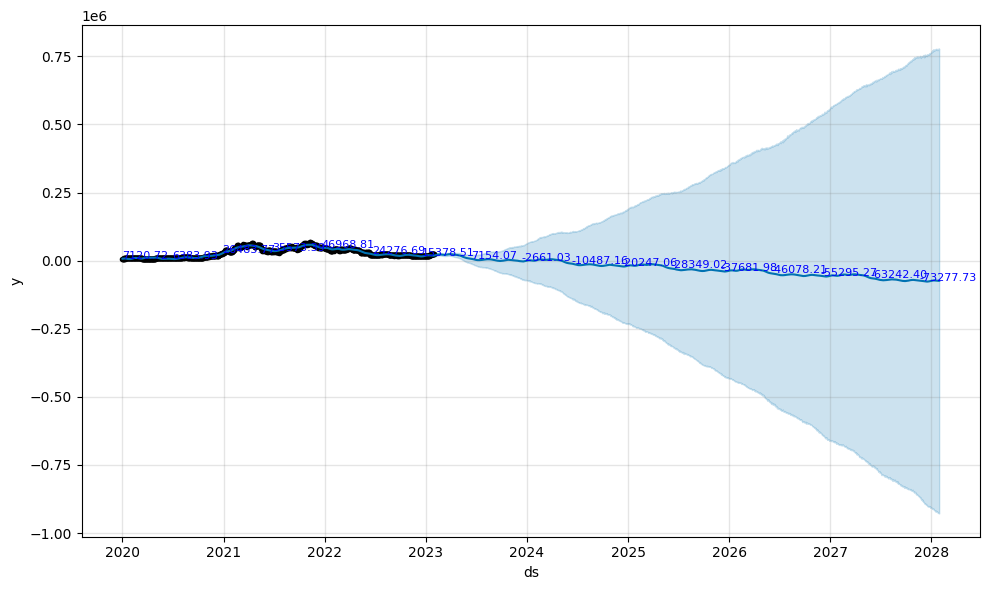

<Figure size 600x400 with 0 Axes>

In [131]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the Bitcoin historical data from a CSV file
Bitcoindf = pd.read_csv('/content/Bitcoin_Historical_Data.csv')

# Replace commas and convert the 'Price' column to a float
# Adjust 'Price' to specific column name if it's different
Bitcoindf['Price'] = Bitcoindf['Price'].str.replace(',', '').astype(float)

# Rename the columns for Prophet compatibility
Bitcoindf.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Define and fit the model
model = Prophet()
model.fit(Bitcoindf)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=1825) # Forecasting for the next 5 years

# Make prediction
forecast = model.predict(future)
print(forecast)


# Create the plot
fig = model.plot(forecast)

# Adding values on the plot
# Only annotate a subset of points to avoid clutter
ax = fig.gca()
for index, datapoint in enumerate(forecast[['ds', 'yhat']].itertuples()):
    if index % 180 == 0:  # Annotating one point every 180 days
        ax.text(datapoint.ds, datapoint.yhat, f'{datapoint.yhat:.2f}', color='blue', fontsize=8, ha='left')

# Show the plot
# Set the plot size
plt.figure(figsize=(6, 4))
plt.show()


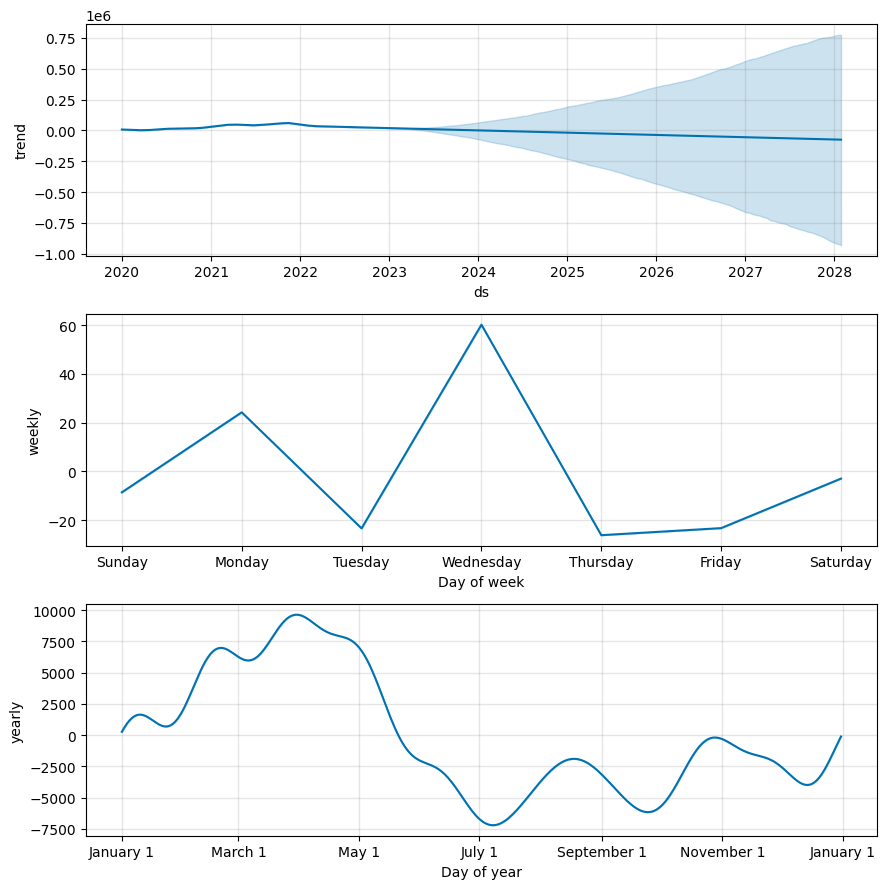

In [132]:
# the components of the forecast Trend, Yearly, Monthly, Weekly and Daily
model.plot_components(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/vpr7_bsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnsmd_ae1/lzdu_a_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80930', 'data', 'file=/tmp/tmpnsmd_ae1/vpr7_bsz.json', 'init=/tmp/tmpnsmd_ae1/lzdu_a_h.json', 'output', 'file=/tmp/tmpnsmd_ae1/prophet_modelrd14p2cd/prophet_model-20231118033519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:35:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


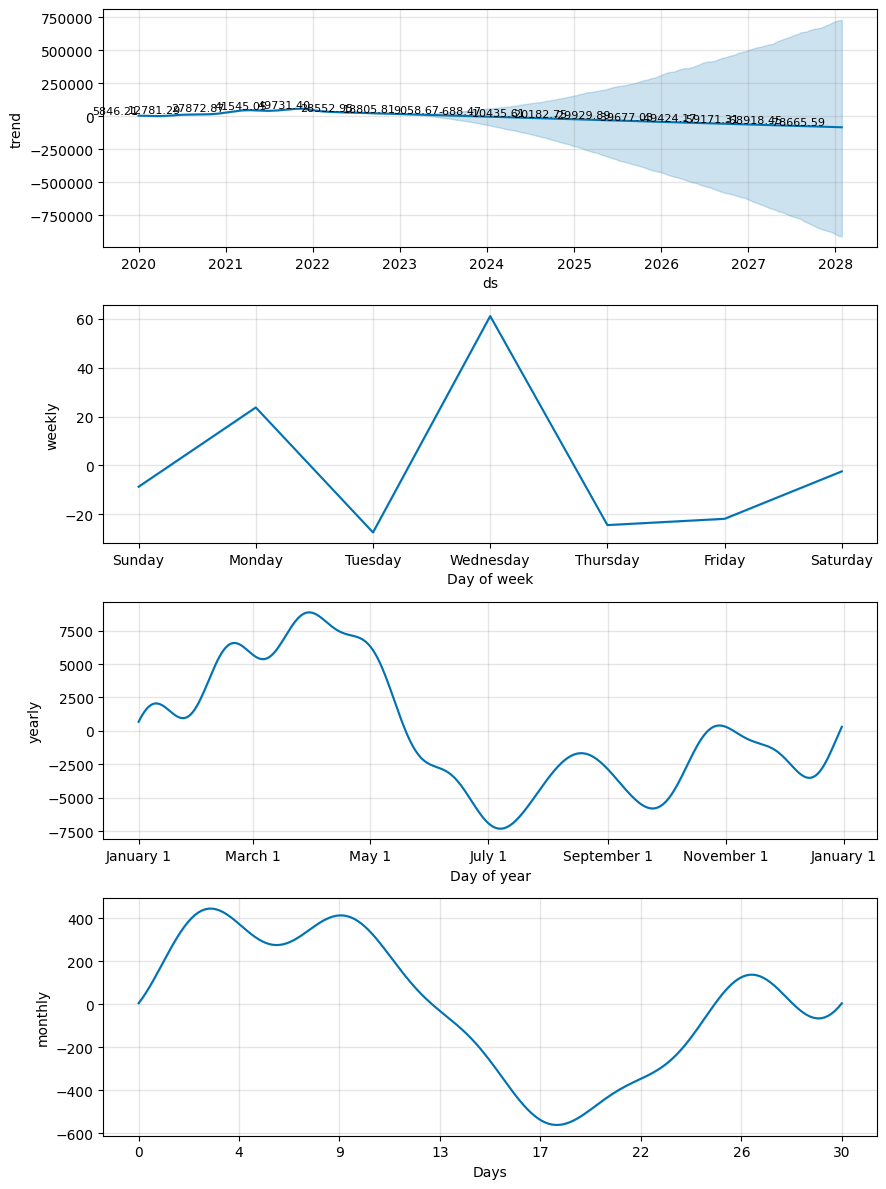

In [133]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the Bitcoin historical data from a CSV file
Bitcoindf = pd.read_csv('/content/Bitcoin_Historical_Data.csv')

# Replace commas and convert the 'Price' column to a float
# Adjust 'Price' to specific column name if it's different
Bitcoindf['Price'] = Bitcoindf['Price'].str.replace(',', '').astype(float)

# Rename the columns for Prophet compatibility
Bitcoindf.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Initialize the model
model = Prophet()

# Add custom seasonality before fitting the model
# Here we add monthly seasonality with a period of 30.5 days and a Fourier order of 5
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model with the historical data
model.fit(Bitcoindf)

# Make future dataframe for prediction
future = model.make_future_dataframe(periods=1825)  # Forecasting for the next 5 years

# Make prediction
forecast = model.predict(future)

# Plot the forecast components
fig = model.plot_components(forecast)

# Since the values in the plot, this part would require a custom plotting function
# It is typically not straightforward to add values to these plots due to their nature
# Here's an example to add annotations to the trend component plot
ax_trend = fig.axes[0]  # The first subplot is the trend
for i in range(forecast.shape[0]):
    if i % 180 == 0:  # Annotate one point every 180 days to avoid clutter
        ax_trend.text(forecast.loc[i, 'ds'], forecast.loc[i, 'trend'],
                      f'{forecast.loc[i, "trend"]:.2f}',
                      ha='right', va='bottom', fontsize=8, color='black')

# Display the plot
plt.show()
